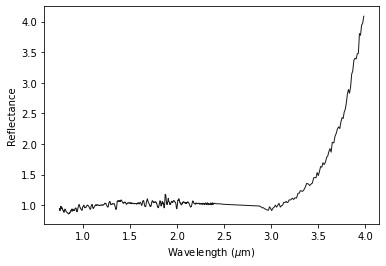

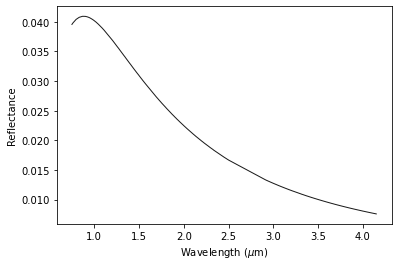

In [1]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
import cana
from cana.datasets import getspectrum
import numpy as np
import plotly.express as px

df = px.data.tips()

spec = cana.loadspec('/home/camila/Desktop/TCC/TCC-Asteroides-jupyter-notebook/752-Sulamitis-com-binagem.txt')

spec.plot()


specr = cana.loadspec('/home/camila/Desktop/TCC/TCC-Asteroides-jupyter-notebook/sulamitis_reflected.txt')

specr.plot()

In [2]:
spec.shape

(779, 2)

In [3]:
specr.shape

(3174, 2)

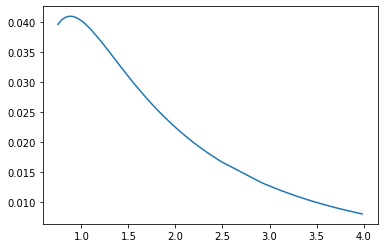

In [4]:
specrnovo = np.interp(spec.w, specr.w, specr.r)
plt.plot(spec.w, specrnovo)

In [11]:
def func(wave, albedo, eta):
    phi = np.radians(4.83) #angulo de fase
    distancia_do_sol = 2.36
    distancia_da_terra = 1.38
    m = cana.NEATM(distancia_do_sol, distancia_da_terra, phi, eta)
    magnitude_absoluta = 10.34
    diametro = (1329/np.sqrt(albedo))*(10**(-0.2*magnitude_absoluta))
    thermal_spec = m.flux(albedo, diametro, wavelengths=wave)
    return thermal_spec.r

spect = func(spec.w, 0.045, 0.83)

/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning:

overflow encountered in exp



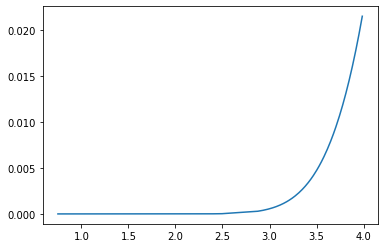

In [12]:
plt.plot(spec.w, spect)

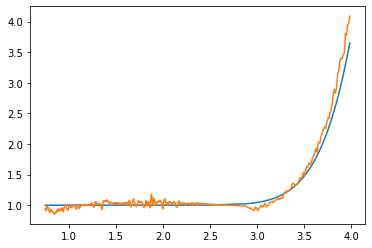

In [13]:
gama = (specrnovo + spect) / specrnovo

plt.plot(spec.w, gama)
plt.plot(spec.w, spec.r)